### Import necessary libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

### Read all the file names in all 4 folders (cinderella, doremon, micky mouse, pokemon)

In [2]:
cindarella=glob.glob('cindarella/*.jpg')
doremon=glob.glob('doremon/*.jpg')
micky_mouse=glob.glob('micky_mouse/*.jpg')
pokemon=glob.glob('pokemon/*.jpg')

In [3]:
print(len(pokemon))

63


In [4]:
print(len(cindarella))

45


In [5]:
print(len(micky_mouse))

59


In [6]:
print(len(doremon))

61


### Read image data from all files and store it in a variable, Store the label as well

In [9]:
images=[]
labels=[]

for i in cindarella:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in doremon:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in micky_mouse:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)

for i in pokemon:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)
                                        

### Store label value - name in a dictionary

In [10]:
label_name={1:'cindarella',2:'doremon',3:'micky_mouse',4:'pokemon'}

### Shuffle images list and the labels

In [13]:
images,labels=shuffle(images,labels)

### View some of the images

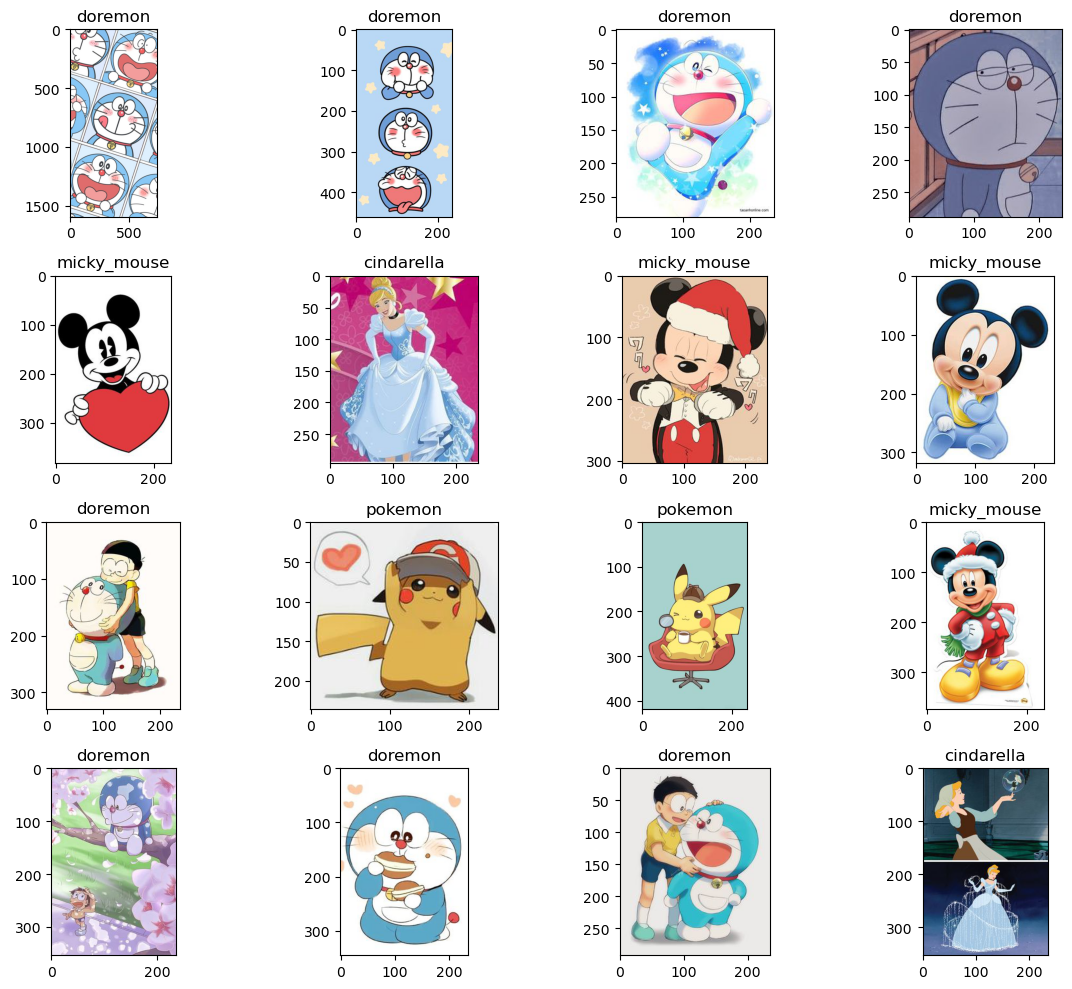

In [24]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_name[labels[i]])
plt.tight_layout()    

### Resize all the images to same dimension

In [21]:
x=[]


for i in images:
    x.append(resize(i,(300,300,3)))

### View some of the images after resizing

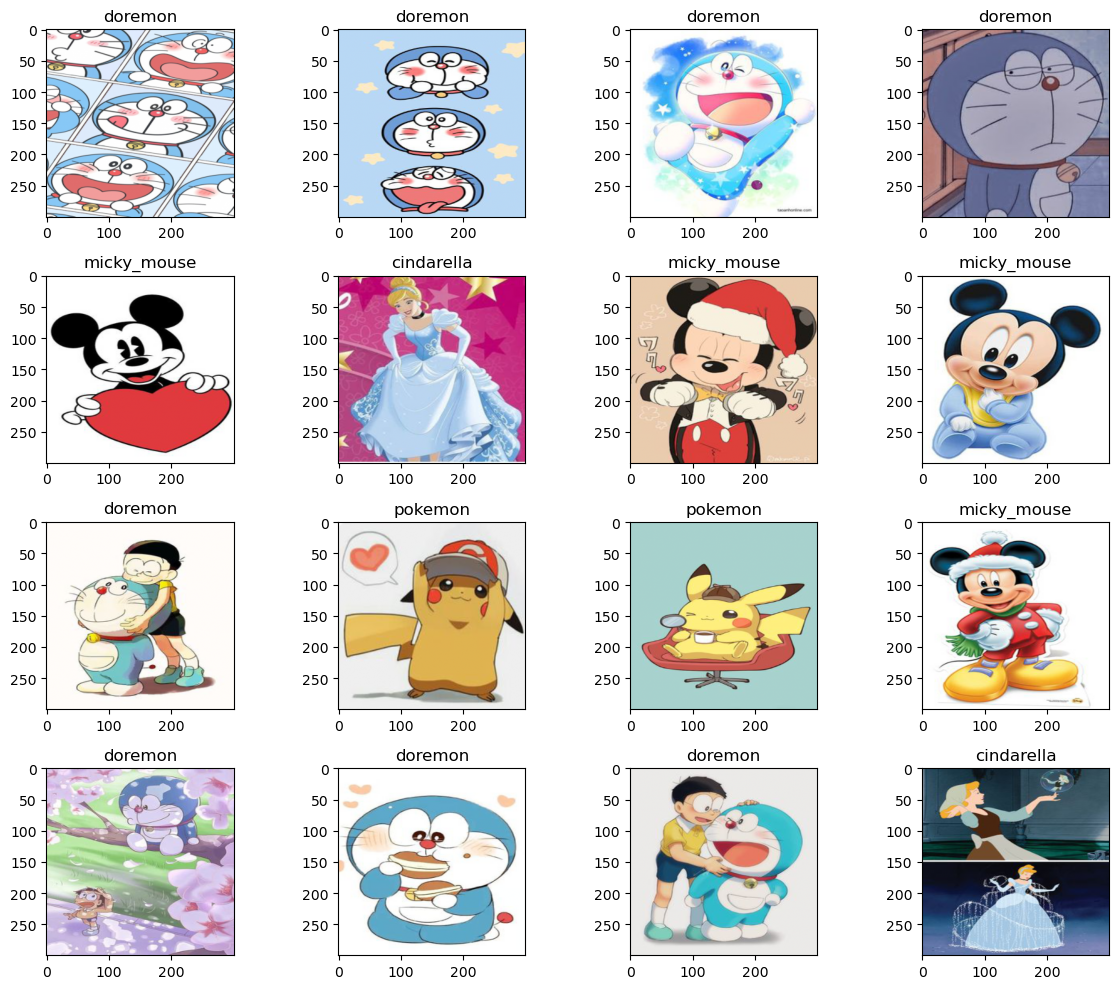

In [25]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(label_name[labels[i]])
plt.tight_layout()    

### Convert images and labels to numpy array and name it x&y respectively

In [27]:
x=np.array(x)
y=np.array(labels)

### Flatten image array

In [28]:
x.shape

(228, 300, 300, 3)

In [29]:
d1,d2,d3,d4=x.shape

In [31]:
x=x.reshape(d1,d2*d3*d4)

In [33]:
x[0]

array([1.        , 1.        , 1.        , ..., 0.96106113, 0.96108186,
       0.96113302])

### Split the dataset into training data and testing data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Create SVM model

In [37]:
model=SVC()

### Train the model

In [40]:
%time model.fit(x_train,y_train)

CPU times: total: 33.4 s
Wall time: 18 s


SVC()

### Make predictions with x_test 

In [43]:
y_pred=model.predict(x_test)

### Plot some of the text images with the predicted label

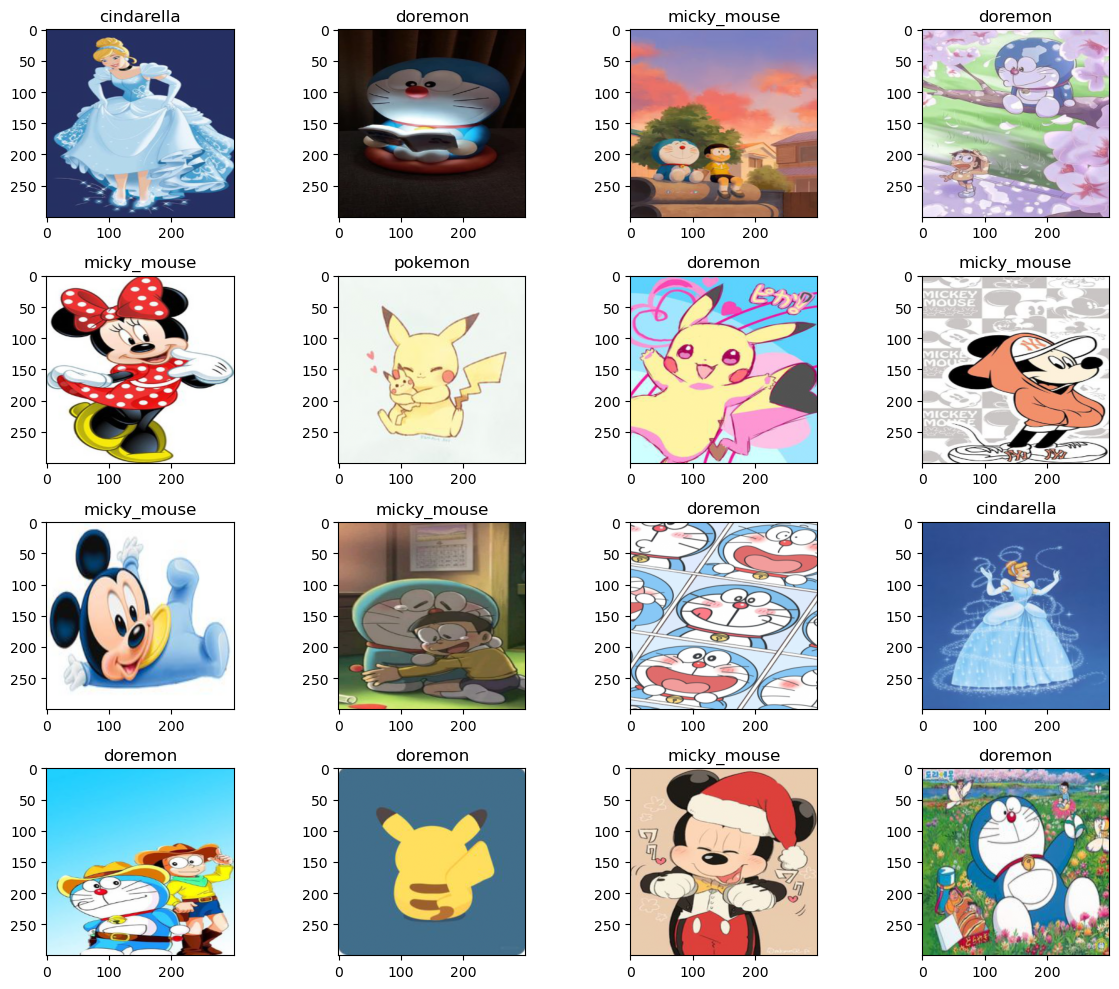

In [47]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(300,300,3))
    plt.title(label_name[y_pred[i]])
plt.tight_layout()    

### Check accuracy of our prediction

In [50]:
metrics.accuracy_score(y_test,y_pred)

0.8043478260869565

### Plot confusion metrics on heatmap

<Axes: >

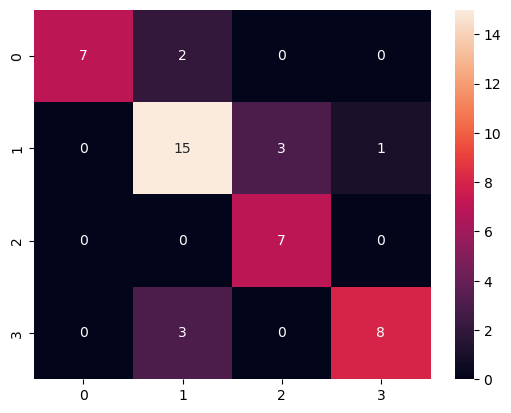

In [55]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

### Print classification report

In [57]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.78      0.88         9
           2       0.75      0.79      0.77        19
           3       0.70      1.00      0.82         7
           4       0.89      0.73      0.80        11

    accuracy                           0.80        46
   macro avg       0.83      0.82      0.82        46
weighted avg       0.82      0.80      0.81        46

